<a href="https://colab.research.google.com/github/Aleksandera0o/ML_VVSU/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Clustering.csv',index_col=0)
df

,x,y
1,3.367596,3.536694
2,2.667870,4.479919
3,1.344171,3.282591
4,1.389414,4.683227
5,1.644644,4.320822
...,...,...
186,8.610144,10.429247
187,6.775686,11.724382
188,7.023465,9.632056
189,6.115584,9.449803


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [4]:
df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       190 non-null    float64
 1   y       190 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


<Axes: >

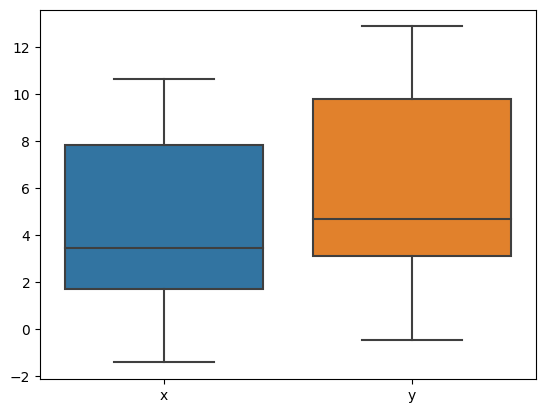

In [5]:

df_clust = df.copy()#тут всего 2 столбца
sns.boxplot(df)# выбросов нет

In [6]:
df_clust.describe()

,x,y
count,190.000000,190.000000
mean,4.721308,6.345303
std,3.294171,3.614820
min,-1.428115,-0.476742
25%,1.713220,3.126976
50%,3.462090,4.697728
75%,7.858967,9.802251
max,10.674577,12.894445


<ipython-input-8-31eb43050805>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['x'], hist=True, kde=False,


<Axes: xlabel='x'>

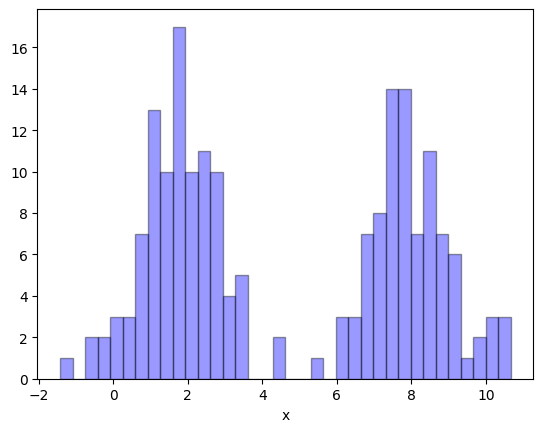

In [8]:
sns.distplot(df_clust['x'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

<ipython-input-9-b28fb92f2aa2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['y'], hist=True, kde=False,


<Axes: xlabel='y'>

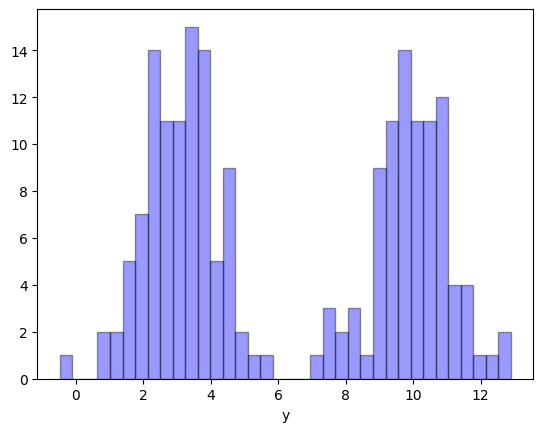

In [9]:
sns.distplot(df_clust['y'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

У нас не равномерное распределение у веса в грамах и у цены похоже но, но слишком большой рост вверх, поэтому будет использовано мин макс для всех колонок которые были выбраны

In [11]:

min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['x','y']])
df_clust[['x','y']] = min_max_scal
df_clust.x.unique()

array([0.39625158, 0.33843583, 0.22906359, 0.23280182, 0.25389052,
       0.18212001, 0.38770021, 0.10290838, 0.21204621, 0.18072669,
       0.29684648, 0.11024952, 0.26249062, 0.28968614, 0.32098993,
       0.16879138, 0.35027143, 0.34269169, 0.27605419, 0.38502061,
       0.23893627, 0.28489946, 0.3266028 , 0.32849916, 0.20306065,
       0.40741214, 0.25857869, 0.22970259, 0.13674898, 0.24193391,
       0.32631489, 0.30289945, 0.28323116, 0.33515978, 0.41406849,
       0.22342707, 0.13895249, 0.2706922 , 0.34093787, 0.16603197,
       0.22022609, 0.2501325 , 0.1303623 , 0.27248077, 0.30416699,
       0.26808861, 0.29399103, 0.31119397, 0.22361286, 0.27556969,
       0.30762426, 0.32353084, 0.37794454, 0.1747661 , 0.12776834,
       0.38478118, 0.18695936, 0.33865645, 0.20023727, 0.27231004,
       0.18529645, 0.15237889, 0.21735152, 0.20295573, 0.35153526,
       0.05881404, 0.3285402 , 0.26373556, 0.25654732, 0.24883287,
       0.27182819, 0.        , 0.20053933, 0.3505963 , 0.29014

In [ ]:
#LabelEncoder не надо так как нет категорических

In [12]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski Harabasz Score 2, с баллом 1764.3992186397186
Оптимальное число кластеров Silhouette Score 2, с баллом 0.795572649620447
Оптимальное число кластеров Davies Bouldin Score 2, с баллом 0.2867702550663719


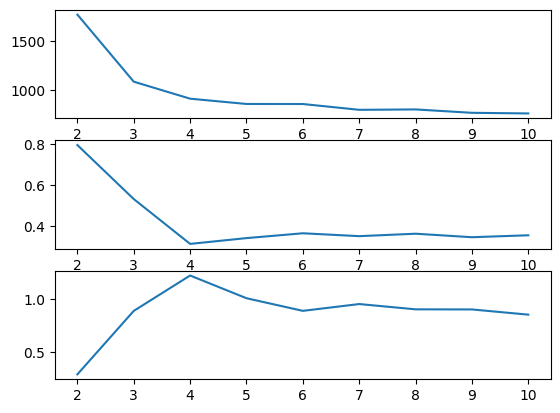

In [13]:

# your_code here
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  score_1.append(calinski_harabasz_score(df_clust,kmeans.labels_))
  score_2.append(silhouette_score(df_clust,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_clust,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)
# plt.show()

Было выбрано 2 кластера так как все метрикм сказали что 2 это оптимальный

In [14]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""
import numpy as np

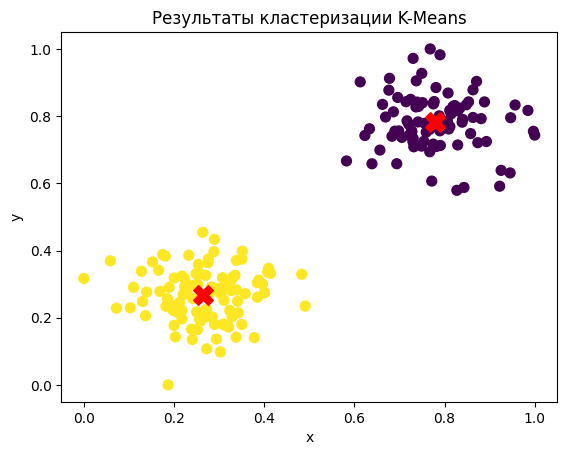

In [16]:
kmeans = KMeans(n_clusters= 2,n_init = 10,random_state = 42)
kmeans.fit(min_max_scal)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_clust['x'], df_clust['y'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [17]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

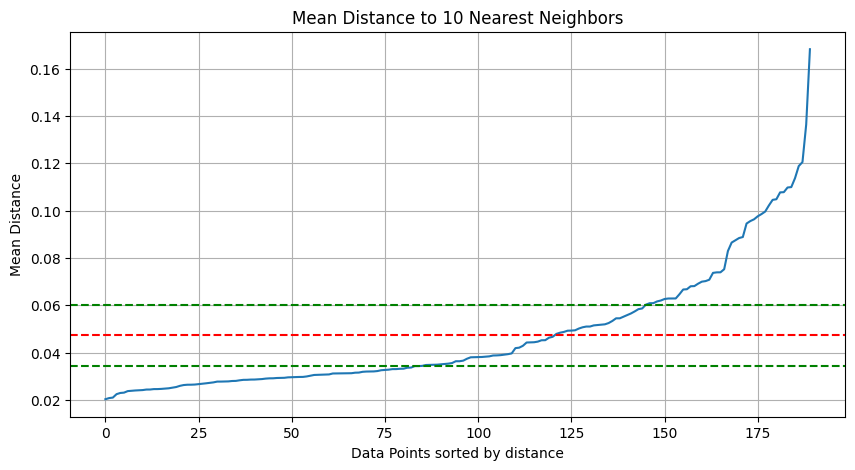

Оптимальный EPS = 0.047313309360357124


In [22]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:10]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 10 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

[-1  0  1  2  3  4  5]


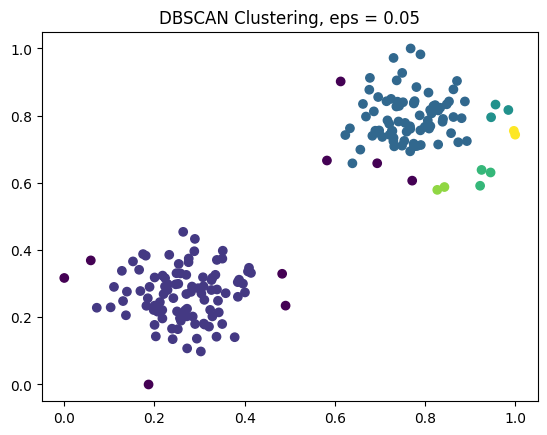

[0]


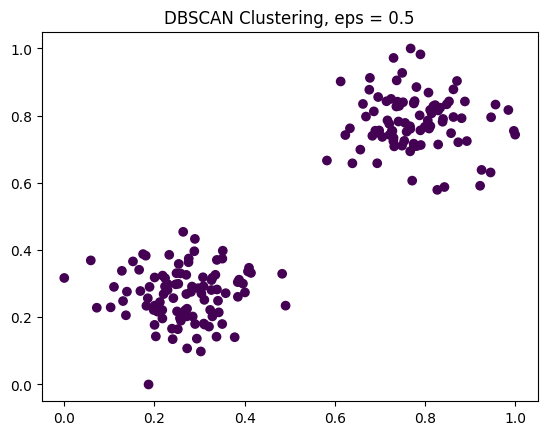

[0 1]


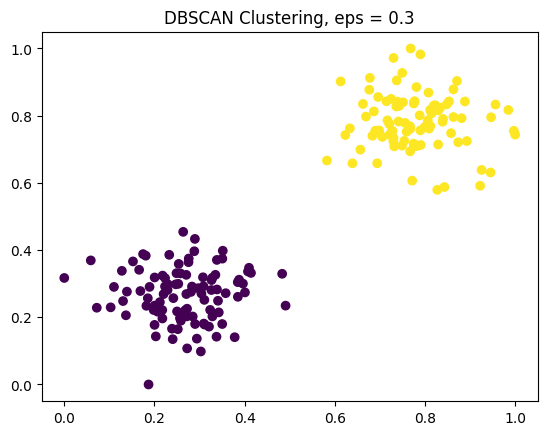

[-1  0  1  2  3  4  5  6  7  8  9]


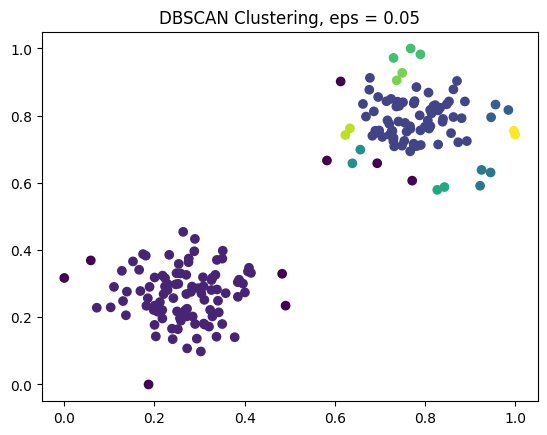

In [23]:

for eps in [0.05,0.5,0.3,0.047313309360357124]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=2)
  dbscan.fit(min_max_scal)
  labels_db = dbscan.labels_
  print(np.unique(labels_db))
  # Визуализация результатов, темные точки - выбросы
  plt.scatter(df_clust['x'], df_clust['y'], c=labels_db, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [ ]:
# как я понял данный алгоритм тут плох так как данные очень близко друг к другу находятся

In [24]:
"""
Здесь иерархическая кластеризация и метрики
"""
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [ ]:
# your_code here

In [25]:

score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k,linkage='average')

  clusters = cluster_model.fit(min_max_scal)

  score_2.append(silhouette_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")


Оптимальное число кластеров Silhouette Score 2, с баллом 0.795572649620447


так как значение меньше чем 0,5 то не реливантно данная метрика(других я не нашел в инернете) поэтому буду строить по 4 как было в means для примера

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

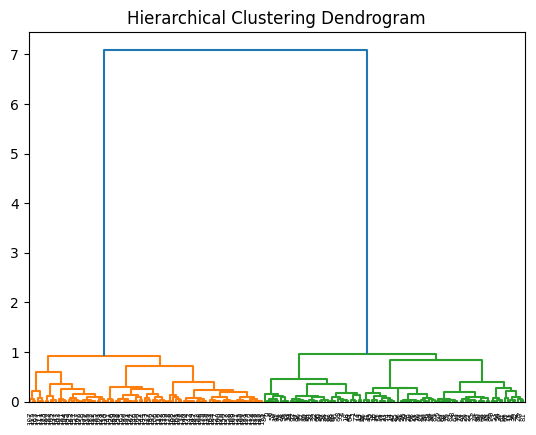

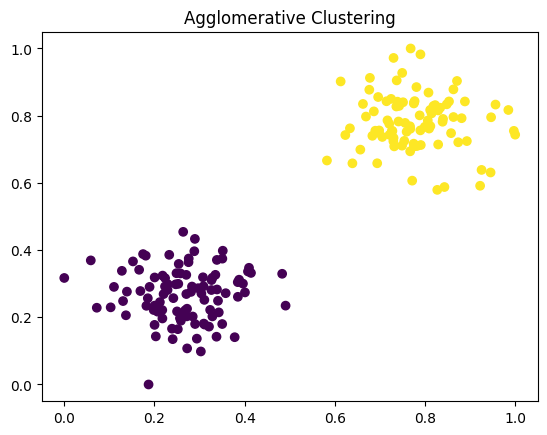

In [27]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(min_max_scal)
linkage_matrix = hierarchy.linkage(min_max_scal, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Визуализация результатов кластеризации
plt.scatter(df_clust['x'], df_clust['y'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

**НЕТ СМЫСЛА ТАК КАК 2 ПАРАМЕТРА И ОНИ ОБА В КЛАСТЕРИЗАЦИИ И ЭТО ВЕСЬ ДАТАСЕТ**

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()

